# CM 1 Pembelajaran Mesin 2025
# Kelas TI3F

Nama : Ahmad Dzul Fadhli Hannan  
Absen : 2  
NIM : 2341720106  

# Dataset

Download dataset pada https://storage.googleapis.com/kuliah_mah/UTS2526.zip dan gunakan data sesuai dengan studi kasus yang didapatkan

# Studi Kasus 2 - CC General

- Studi kasus ini berikaitan dengan data nasabah pengguna kartu kredit.
- Untuk mahasiswa dengan no absen 2, 5, 8, 11, dst
- Lakukan beberapa tahapan berikut dan lakukan proses analisis terhadap hasil yang dihasilkan.

## Pra Pengolahan Data (20 poin)

1. Load data (5 poin)
2. Lakukan data imputation pada data yang kosong. Lampirkan analisis Anda mengapa menggunakan metode impute tersebut. (10 poin)
3. Drop fitur yang tidak relevan (5 poin)

## Clustering - 1 (30 poin)

1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10. (10 poin)
2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan. (10 poin)
3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow? (10 poin)

NB: Anda diperbolehkan untuk melakukan proses normalisasi/standardisasi sebelum pembuatan model clustering. Lakukan pengamatan terhadap hasil clustering.

## Clustering - 2 (20 poin)

1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan? (10 poin)
2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN? (10 poin)

## Feature Selection (30 poin)
Setelah mengetahui performa hasil clustering pada model KMeans dan DBSCAN berdasakan silhouette coefficient dan DBI, lakukan proses feature selection untuk meningkatkan nilai silhouette coefficient dan DBI. Anda diperbolehkan untuk menggunakan metode iterative process atau metode yang lain.

1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur
2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?


## BONUS - CHALLENGE (30 poin)
Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Pra Pengolahan Data (20 poin)

In [12]:
import pandas as pd
import numpy as np

# 1. Load Data
df = pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/p8 (kuis)/data/2_CC_GENERAL.csv')
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

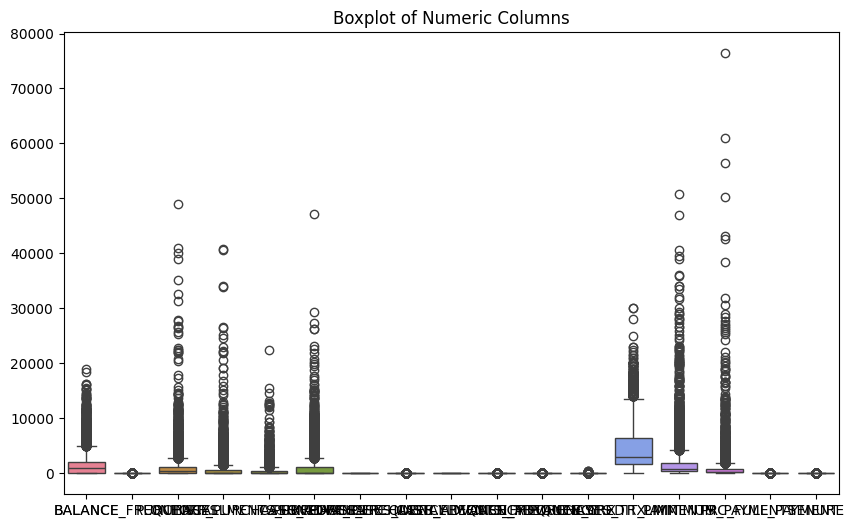

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df)
plt.title('Boxplot of Numeric Columns')
plt.show()

In [13]:
# 2. Data imputation
for col in df.columns:
  if df[col].isnull().sum() > 0:
    if df[col].dtype != 'object':
      df[col].fillna(df[col].median(), inplace=True)

# Alasan saya menggunakan median karena  untuk kolom dengan nilai kosong karena terdapat outlayer pada fitur

/tmp/ipython-input-1741944020.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [14]:
# 3. Drop fitur yang tidak relevan
df = df.drop(['CUST_ID'], axis=1)

# Clustering - 1 (30 poin)

In [15]:
# 1. Lakukan pembuatan model cluster dengan menggunakan KMeans dengan jumlah cluster mulai 1 hingga 10.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_array = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

sse = []
kmeanModels = []
cluster = range(1,11)

for k in cluster:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df_scaled)
  sse.append(kmeanModel.inertia_)

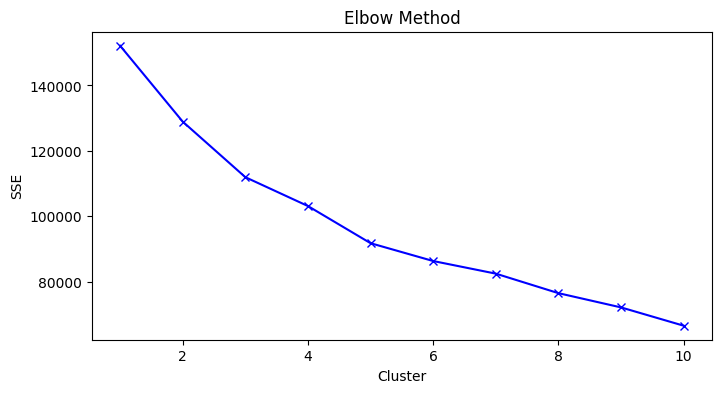

In [8]:
# 2. Buat diagram elbow, tentukan jumlah cluster terbaik menurut elbow method dan berikan alasan.
plt.figure(figsize=(8,4))
plt.plot(cluster, sse, "bx-")
plt.xlabel("Cluster")
plt.ylabel("SSE")
plt.title("Elbow Method")
plt.show()

Menurut saya cluster terbaik adalah K=3, karena K=3 karena penurunannya masih dibilang sse nya masih sangat tajam, dan bisa dilihat pada K diatas 3 penurunan sse nya menjadi tidak terlalu tajam dan menjadi lebih linier.

In [9]:
# 3. Hitung nilai silhouette coefficient dari k=1 hingga k=10. Berdassarkan nilai silhouette, berapa jumlah cluster terbaik? Apakah sama dengan metode elbow?
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster = range(2, 11)

for k in cluster:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(df_scaled)
  score = silhouette_score(df_scaled, kmeanModel.labels_)
  silhouette_scores.append(score)
  print(f"Silhouette Score for k={k}: {score}")

Silhouette Score for k=2: 0.27953987242960154
Silhouette Score for k=3: 0.25061926305697263
Silhouette Score for k=4: 0.19748054613727428
Silhouette Score for k=5: 0.1931421432242041
Silhouette Score for k=6: 0.1882167032294634
Silhouette Score for k=7: 0.20727721314714112
Silhouette Score for k=8: 0.21919456582692082
Silhouette Score for k=9: 0.22656744724216668
Silhouette Score for k=10: 0.21827800831737207


Cluster terbaik berdasarkan nilai silhoutte adalah K=2. Hasilnya berbeda dengan metode elbow. Karena

# Clustering - 2 (20 poin)

In [10]:
# 1. Lakukan pembuatan model cluster dengan menggunakan DBSCAN. Berapa jumlah cluster yang dihasilkan?
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=2)
cluster_db = dbscan.fit_predict(df_scaled)
jumlah_cluster = len(np.unique(cluster_db)) - (1 if -1 in cluster_db else 0)
print(f"Jumlah Cluster DBSCAN: {jumlah_cluster}")

Jumlah Cluster DBSCAN: 341


In [11]:
# 2. Berapa nilai silhouette coefficient dan DBI dari cluster yang dihasilkan oleh DBSCAN?
score_silhoute_db = silhouette_score(df_scaled, cluster_db)
from sklearn.metrics import davies_bouldin_score
score_dbi_db = davies_bouldin_score(df_scaled, cluster_db)
print(f"Silhouette Score DBSCAN: {score_silhoute_db}")
print(f"DBI Score DBSCAN: {score_dbi_db}")


Silhouette Score DBSCAN: -0.5196484277852924
DBI Score DBSCAN: 1.3352010893453585


# Feature Selection (30 poin)

In [14]:
# 1. Fitur apa yang memberikan nilai silhouette coefficient/DBI terbaik? Lengkapi dengan proses pemilihan fitur

# Mennggunakan metode iterasi Backward Elimination

K = 2

def kmean_cal(df, k):
    if df.shape[1] < 2:
        return -1, float('inf')
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=1)
    labels = kmeanModel.fit_predict(df)
    if len(np.unique(labels)) < 2:
        return -1, float('inf')
    score_silhouette = silhouette_score(df, labels)
    score_dbi = davies_bouldin_score(df, labels)
    return score_silhouette, score_dbi

fitur = list(df_scaled.columns)
silhoute_terbaik = -1
fitu_silhoute_terbaik = []

while len(fitur) > 1:
    current_silhouette, current_dbi = kmean_cal(df_scaled[fitur], K)

    if current_silhouette > silhoute_terbaik:
        silhoute_terbaik = current_silhouette
        fitu_silhoute_terbaik = fitur.copy()

    skor_setelah_dihapus = {}
    for tes_fitur in fitur:
        copy_fitur = fitur.copy()
        copy_fitur.remove(tes_fitur)

        silhouette, dbi = kmean_cal(df_scaled[copy_fitur], K)
        skor_setelah_dihapus[tes_fitur] = silhouette

    if not skor_setelah_dihapus:
        break

    drop_fitur = max(skor_setelah_dihapus, key=skor_setelah_dihapus.get)

    if skor_setelah_dihapus[drop_fitur] < silhoute_terbaik:
        break

    fitur.remove(drop_fitur)


fitur = list(df_scaled.columns)
dbi_terbaik = float('inf')
fitu_dbi_terbaik = []

while len(fitur) > 1:
    current_silhouette, current_dbi = kmean_cal(df_scaled[fitur], K)

    if current_dbi < dbi_terbaik:
        dbi_terbaik = current_dbi
        fitu_dbi_terbaik = fitur.copy()

    skor_setelah_dihapus = {}
    for tes_fitur in fitur:
        copy_fitur = fitur.copy()
        copy_fitur.remove(tes_fitur)

        silhouette, dbi = kmean_cal(df_scaled[copy_fitur], K)
        skor_setelah_dihapus[tes_fitur] = dbi

    if not skor_setelah_dihapus:
        break

    drop_fitur = min(skor_setelah_dihapus, key=skor_setelah_dihapus.get)

    if skor_setelah_dihapus[drop_fitur] > dbi_terbaik:
        break

    fitur.remove(drop_fitur)

print(f"Silhouete Score Terbaik: {silhoute_terbaik:.4f}")
print(f"Fitur Silhouete Terbaik: {fitu_silhoute_terbaik}")
print(f"\nDBI Score Terbaik: {dbi_terbaik:.4f}")
print(f"Fitur DBI Terbaik: {fitu_dbi_terbaik}")


Silhouete Score Terbaik: 0.8971
Fitur Silhouete Terbaik: ['ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS']

DBI Score Terbaik: 0.5893
Fitur DBI Terbaik: ['PURCHASES', 'ONEOFF_PURCHASES']


In [ ]:
# 2. Mengapa Anda menggunakan metode pemilihan fitur tersebut?
# Saya memilih metode iterasi backward elimination karena dengan metode tersebut saya bisa melakukan perhitungan nilai silhoute dan dbi dengan jumlah dan kombinasi fitur yang bervariasi,
# mulai dari 17 fitur lalu terus menerus fiturnya dikurangi / drop satu persatu dengan perulangan. Terakhir akan dipilih fitur yang skor silhoute atau dbi yang terbaik.

# BONUS - CHALLENGE (30 poin)

In [2]:
# Install ANNOY
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551811 sha256=f6e59a860a1973d4a48e119c5d37674ae91d2569945e5c0dd545dd407a3e4982
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [50]:

# Buatlah model ANNOY menggunakan data yang telah melalui proses pra pengolahan data. Lakukan query dengan 5 nilai terdekat. Apakah ANNOY melakukan query pada cluster terbaik yang telah Anda bentuk?
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex
from sklearn.preprocessing import StandardScaler

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(df.values)

results = {}

X = df.values

n_data, dim = X.shape

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).astype(np.float32)

K = 5

query_index = np.random.randint(0, n_data)
query_vector = X_scaled[query_index]
query_cluster = labels_kmeans[query_index]

start = time.time()
annoy_index = AnnoyIndex(dim, 'euclidean')
for i in range(n_data):
    annoy_index.add_item(i, X_scaled[i])

annoy_index.build(10)
build_time = time.time() - start

start = time.time()
neighbors_indices = annoy_index.get_nns_by_vector(query_vector, K + 1)
query_time = time.time() - start
if query_index in neighbors_indices:
    neighbors_indices.remove(query_index)
neighbors_indices = neighbors_indices[:K]

results['ANNOY'] = {'build': build_time, 'query': query_time, 'neighbors': neighbors_indices}

print(f"Build time: {build_time} detik")
print(f"Query time: {query_time} detik")
print(f"Titik Query: Index {query_index}, Cluster {query_cluster}")
print(f"Tetangga terdekat (indeks): {neighbors_indices}")

cluster_count = 0
for i, neighbor_idx in enumerate(neighbors_indices):
    neighbor_cluster = labels_kmeans[neighbor_idx]
    is_same = "sama" if neighbor_cluster == query_cluster else "beda"
    if is_same == "sama":
        cluster_count += 1

accuracy_percentage = (cluster_count / K) * 100
print(f"Tingkat keberhasilan query pada cluster yang benar: {accuracy_percentage}%")

Build time: 0.029078960418701172 detik
Query time: 0.00020694732666015625 detik
Titik Query: Index 130, Cluster 3
Tetangga terdekat (indeks): [916, 244, 234, 654, 254]
Tingkat keberhasilan query pada cluster yang benar: 100.0%


Catatan: setiap eksekusi akan menghasilkan tingkat keberhasilan yang berbeda karena titik cluster dipilih secara acak. Pada output diatas kebetulan tingkat keberhasilan quernya 100% dan termasuk cluster terbaik.